TASK 3

In [26]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

#Creating a new data path for the other data set
DATA_PATH_flow = 'data/PhysicalFlows_12.1.G/*.csv'

files_flow = glob.glob(DATA_PATH_flow)

#Combining all the files in the data set to create one data frame
df_flow_all= pd.concat([pd.read_csv(file, sep='\t') for file in files_flow], ignore_index=True)


In [27]:
#Converting the dates in 'DateTime' to a type thats readable
df_flow_all['DateTime'] = pd.to_datetime(df_flow_all['DateTime'])

#Sets the 'DateTime' as the index
df_flow_all = df_flow_all.set_index('DateTime')

In [28]:
#Sorts the index after date, to make sure that it is in the correct order
df_flow_all = df_flow_all.sort_index()

In [29]:
#Show the data frame, to make sure that it seems correct
df_flow_all

,InMapCode,OutMapCode,FlowValue
DateTime,,,
2019-01-01 00:00:00,AL,GR,173.00
2019-01-01 00:00:00,SE,DE_TenneT_GER,1.60
2019-01-01 00:00:00,DE,PL,0.00
2019-01-01 00:00:00,SE,DE,1.60
2019-01-01 00:00:00,DE,SE,0.00
...,...,...,...
2023-12-31 23:00:00,GB,NIE,121.70
2023-12-31 23:00:00,GB,IE_SEM,121.70
2023-12-31 23:00:00,SI,HU,250.29


In [30]:
#Since Germany have many different codes in the dataframe, we defined all of them to one variable
germany_codes = ['DE', 'DE_50HzT', 'DE_Amprion', 'DE_LU', 'DE_TenneT_GER', 'DE_TransnetBW']

In [31]:
#Create a data frame for the data of the imports from Germany to Norway
imports_to_Norway = df_flow_all[(df_flow_all['OutMapCode'] == 'NO2') & (df_flow_all['InMapCode'].isin(germany_codes))]

In [32]:
imports_to_Norway

,InMapCode,OutMapCode,FlowValue
DateTime,,,
2020-09-01 22:00:00,DE_LU,NO2,0.0
2020-09-01 23:00:00,DE_LU,NO2,0.0
2020-09-02 00:00:00,DE_LU,NO2,0.0
2020-09-02 01:00:00,DE_LU,NO2,0.0
2020-09-02 02:00:00,DE_LU,NO2,0.0
...,...,...,...
2023-12-31 19:00:00,DE_LU,NO2,0.0
2023-12-31 20:00:00,DE_LU,NO2,0.0
2023-12-31 21:00:00,DE_LU,NO2,0.0


In [33]:
#Repeating the previous step, but for Norway to Germany
exports_from_Norway = df_flow_all[(df_flow_all['InMapCode'] == 'NO2') & (df_flow_all['OutMapCode'].isin(germany_codes))]

In [34]:
exports_from_Norway

,InMapCode,OutMapCode,FlowValue
DateTime,,,
2020-09-01 22:00:00,NO2,DE_LU,0.0000
2020-09-01 23:00:00,NO2,DE_LU,0.0000
2020-09-02 00:00:00,NO2,DE_LU,0.0000
2020-09-02 01:00:00,NO2,DE_LU,0.0000
2020-09-02 02:00:00,NO2,DE_LU,0.0000
...,...,...,...
2023-12-31 19:00:00,NO2,DE_LU,1348.2700
2023-12-31 20:00:00,NO2,DE_LU,1348.4700
2023-12-31 21:00:00,NO2,DE_LU,1348.5225


In [35]:
#To avoid changes to the original data, we created copies of the data frames
imports_to_Norway = imports_to_Norway.copy()
exports_from_Norway = exports_from_Norway.copy()

imports_to_Norway['Type'] = 'Import'
exports_from_Norway['Type'] = 'Export'


In [36]:
#Extracts the years from the date, and adds it to a new column
imports_to_Norway['Year'] = pd.to_datetime(imports_to_Norway.index).year
exports_from_Norway['Year'] = pd.to_datetime(exports_from_Norway.index).year

In [37]:
#Groups the data by the type (either 'Export' or 'Import'), and by year. 
#Then uses sum() to find the total sum by these groups. 
annual_imports = imports_to_Norway.groupby(['Year', 'Type'])['FlowValue'].sum()
annual_exports = exports_from_Norway.groupby(['Year', 'Type'])['FlowValue'].sum()

In [38]:
#Combines the two data frames into one. 
#Unstack reshapes the data frame, so that 'Import' and 'Export' becomes two different columns
#and 'Year'becomes the index
combined_data = pd.concat([annual_imports, annual_exports]).unstack()

(array([0, 1, 2, 3]),
 [Text(0, 0, '2020'),
  Text(1, 0, '2021'),
  Text(2, 0, '2022'),
  Text(3, 0, '2023')])

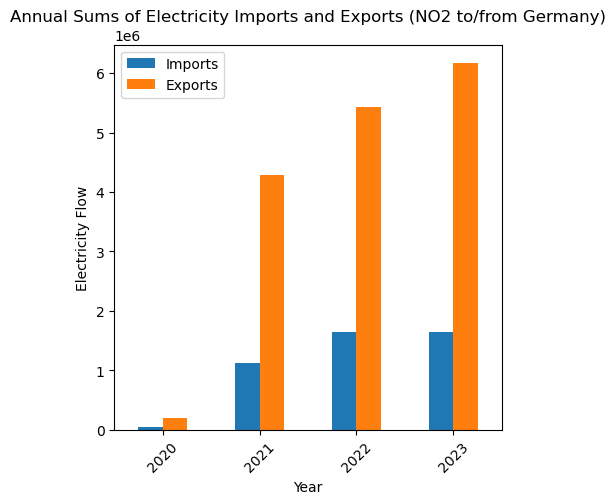

In [39]:
#Creating the figure and defining the size of it
fig, ax = plt.subplots(figsize=(5, 5))
combined_data.plot(kind='bar', ax=ax)

#Setting the x-label as 'Year'
ax.set_xlabel("Year")
#Setting the y-label as 'Electricity Flow'
ax.set_ylabel("Electricity Flow")
#Setting the title of the figure
ax.set_title("Annual Sums of Electricity Imports and Exports (NO2 to/from Germany)")
#Creating a legend to make the code more readable
ax.legend(["Imports", "Exports"])
#
plt.xticks(rotation=45)

NO2 imports more electricity from Germany than it exports. The import level has increased over the last four year, while the level of export did increase between 2020 and 2021, it has stayed relatively still after that. 